# Lineage Tracking for Cells in the Mother Machine

In [1]:
from LineageTrack.lineage_tracker import LineageTrack
from LineageTrack.visualiser import Visualiser
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, display, HTML

### comment out ###
from jupyterthemes import jtplot
jtplot.style(theme='oceans16')

In [2]:
directory = ".\\example\\csv"    # the example includes the first 13 trenches from Charlie's Phage experiment
exp = LineageTrack.from_path(directory)
print(exp)
display(exp.df.head(1))
# or
# filepath1 = ""
# filepath2 = ""
# ...
# exp = LineageTrack.from_path(filepath1, filepath2, ...)

Looking for data at these locations:
.\example\csv\2022_04_22_PC_data_epoch_20_prob_99.csv
.\example\csv\2022_04_22_RFP_data_epoch_20_prob_99.csv
.\example\csv\2022_04_22_YFP_data_epoch_20_prob_99.csv
Finished loading the data
(11859, 11)

                Read 3 files
                Channels: ['PC', 'YFP', 'mCherry']
                Properties for each cell: ['PC_intensity_mean', 'YFP_intensity_mean', 'area', 'centroid-0', 'centroid-1', 'label', 'mCherry_intensity_mean', 'major_axis_length', 'minor_axis_length', 'time_(mins)', 'trench_id']
            


,trench_id,time_(mins),label,area,major_axis_length,minor_axis_length,centroid-0,centroid-1,PC_intensity_mean,mCherry_intensity_mean,YFP_intensity_mean
0,0,0,1,238,53.914722,7.221878,94.672272,65.420166,2048.146973,2647.348633,148.050415


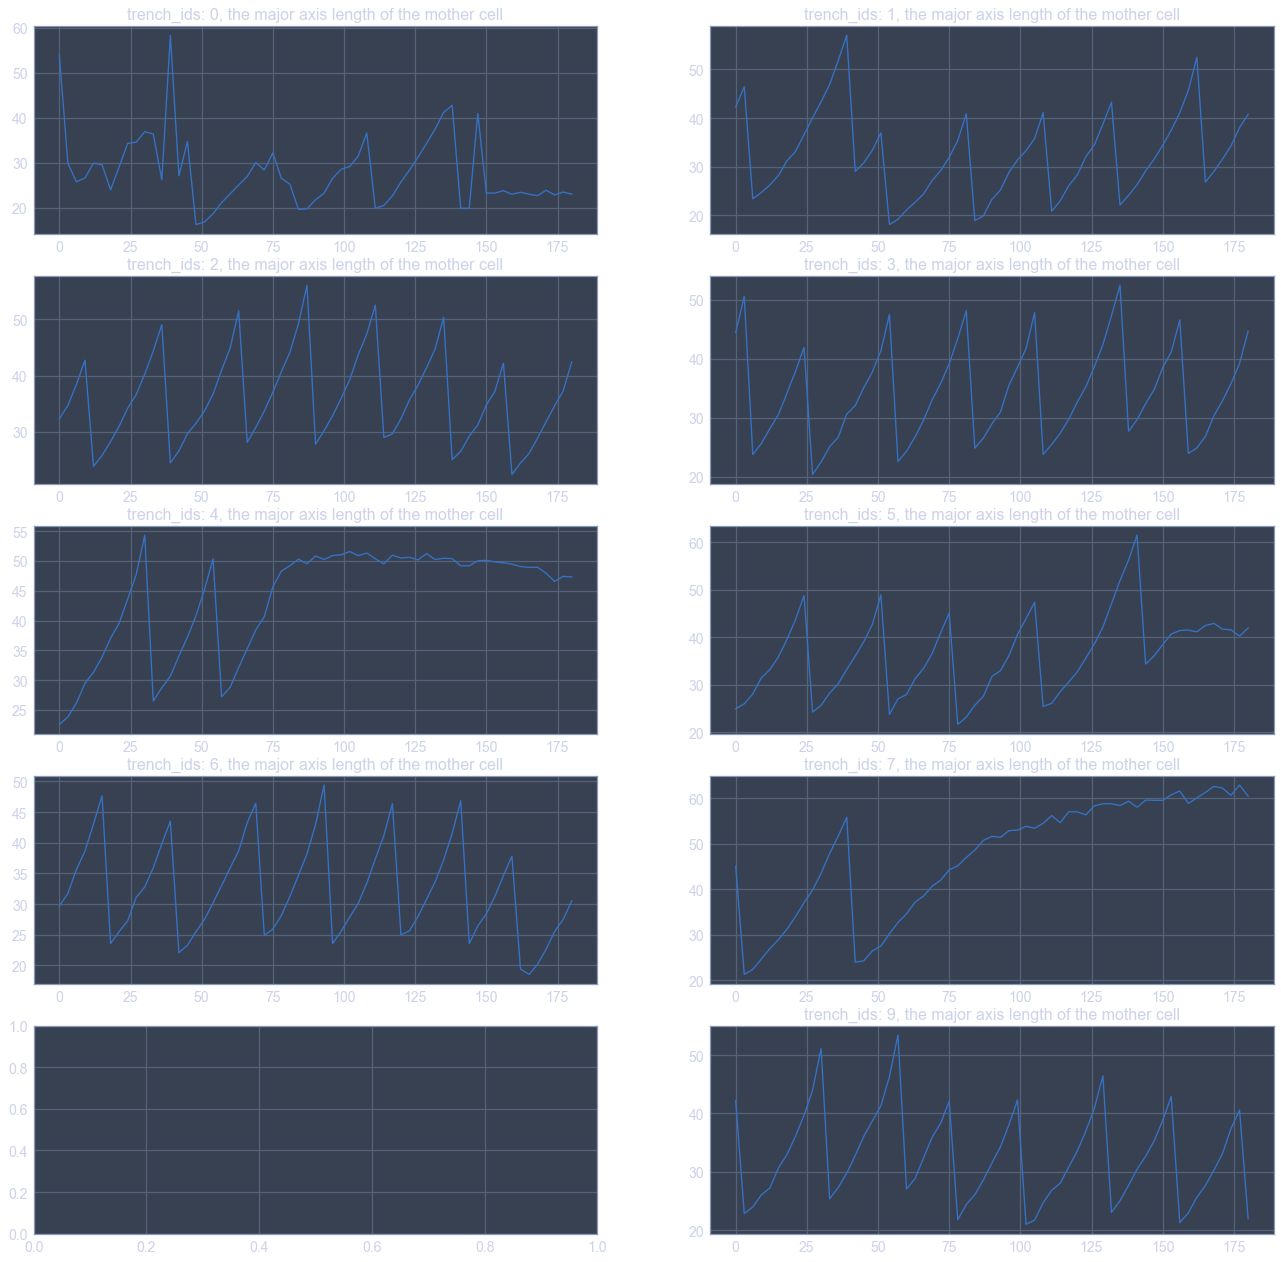

In [3]:
trench_list = [i for i in range(10)]

m = exp.get_mother_cell_growth(trench_list, plot=True)

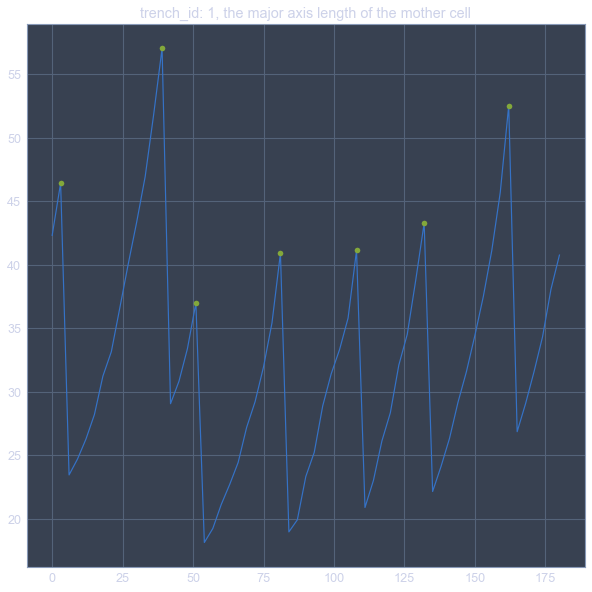

In [4]:
mcell1, idx1 = exp.find_division(1)

In [5]:
# since we are interested in  exponential growth, slice it according to the data
# in this case data between every peaks can be used
e_phase_idx1 = idx1[:]

exp.collect_model_para(mcell1, e_phase_idx1, plot=False)

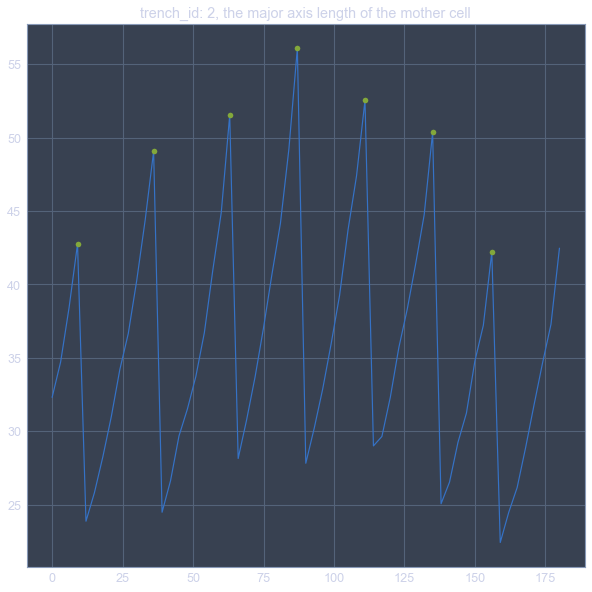

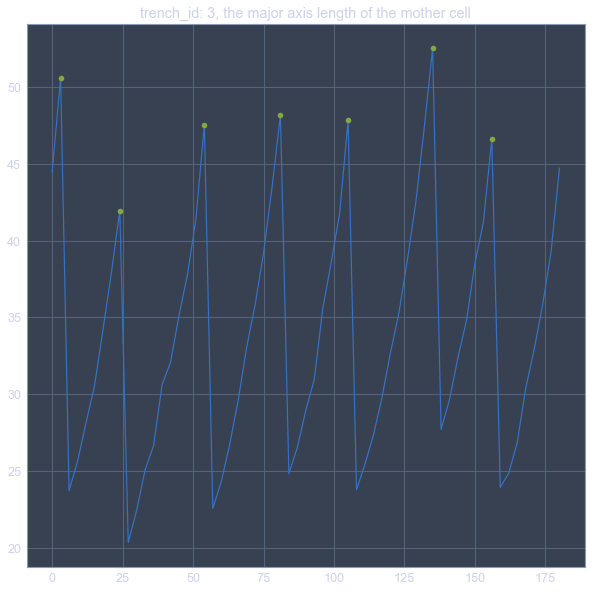

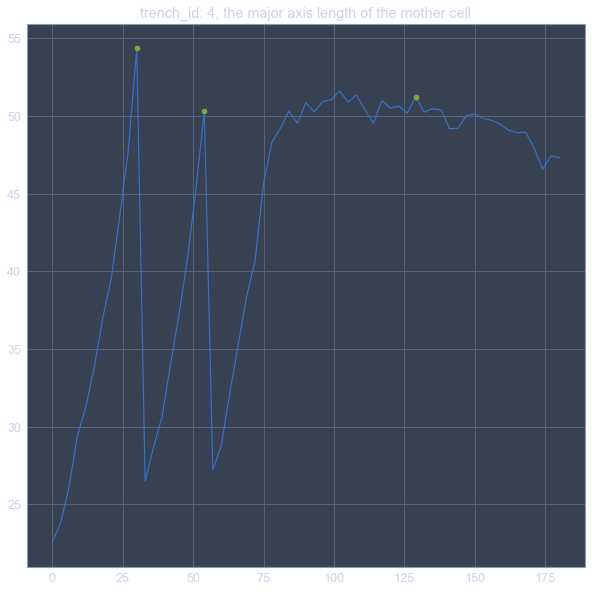

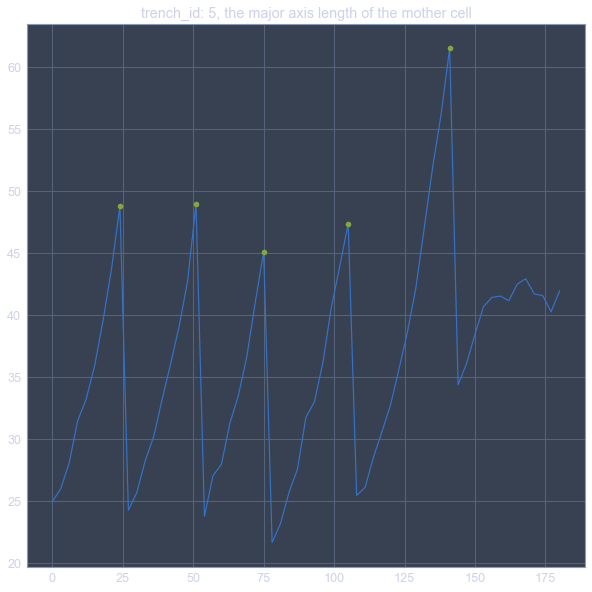

In [6]:
mcell2, idx2 = exp.find_division(2)
mcell3, idx3 = exp.find_division(3)
mcell4, idx4 = exp.find_division(4)
mcell5, idx5 = exp.find_division(5)

In [7]:
exp.collect_model_para(mcell2, idx2[:])
exp.collect_model_para(mcell3, idx3[:])
# slice it according to the data
e_phase_idx4 = idx4[:-1]    # do not use the last peak
exp.collect_model_para(mcell4, e_phase_idx4)
# this is just to show that collect_model_para only need to be run once for each mother cell
exp.collect_model_para(mcell4, e_phase_idx4)
exp.collect_model_para(mcell5, idx5[:])

In [8]:
exp.update_model_para(model="unif")


                    The average time interval for division is 26.08695652173913
                    The time constant for exponential growth is 23.95156924600458
                    The average division length is 48.36530671800886 with variance 29.00931377076993
                    


In [9]:
track_df, lysis_df = exp.track_trench(trench=1, threshold=400, max_dpf=3, show_details=False, ret_df=True)

Tracking over frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [01:10<00:00,  1.17s/it]


In [10]:
display(HTML(track_df.to_html()))
# display(HTML(lysis_df.to_html()))

,trench_id,time_(mins),label,parent_label,centroid,barcode,poles
0,1,0,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]","[None, None, None, None, None, None, None, None, None]","[(60.35348892211914, 109.33023071289062), (60.45933151245117, 153.464111328125), (60.48624038696289, 189.34861755371094), (60.21782302856445, 212.65347290039062), (60.7843132019043, 237.5490264892578), (61.0, 259.5887756347656), (60.197044372558594, 293.4532165527344), (60.49751281738281, 335.0547180175781), (60.67010498046875, 377.69586181640625)]","[0b0, 0b10000000, None, None, None, None, None, None, None]","[(0, 0), None, None, None, None, None, None, None, None]"
1,1,3,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]","[1.0, 2.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]","[(60.71900939941406, 123.4504165649414), (60.63964080810547, 160.63063049316406), (61.13333511352539, 182.84762573242188), (61.26315689086914, 209.98245239257812), (60.70796585083008, 236.19468688964844), (61.224998474121094, 263.14166259765625), (61.48181915283203, 288.68182373046875), (60.922019958496094, 325.1054992675781), (61.22666549682617, 369.977783203125)]","[0b0, 0b10000000, 0b11000000, None, None, None, None, None, None]","[(0, 0), None, None, None, None, None, None, None, None]"
2,1,6,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]","[1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]","[(59.19658279418945, 120.62393188476562), (59.550846099853516, 144.6271209716797), (59.48695755004883, 172.2608642578125), (59.56190490722656, 198.13333129882812), (59.43283462524414, 226.38059997558594), (59.573768615722656, 255.22950744628906), (60.05223846435547, 284.14178466796875), (59.66666793823242, 312.5087585449219), (59.844261169433594, 350.61065673828125), (60.041839599609375, 399.67364501953125)]","[0b0, 0b1000000, 0b10000000, 0b11000000, None, None, None, None, None, None]","[(1, 0), (0, 1), None, None, None, None, None, None, None, None]"
3,1,9,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]","[(59.484127044677734, 113.81745910644531), (60.219696044921875, 141.9469757080078), (60.080291748046875, 171.42335510253906), (60.132232666015625, 200.165283203125), (59.9862060546875, 229.77931213378906), (60.25899124145508, 261.0143737792969), (60.59440612792969, 292.8741149902344), (60.35877990722656, 323.3053283691406), (60.26506042480469, 365.0040283203125)]","[0b0, 0b1000000, 0b10000000, 0b11000000, None, None, None, None, None]","[(1, 0), (0, 1), None, None, None, None, None, None, None]"
4,1,12,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0]","[(60.5, 103.14179229736328), (60.58955383300781, 133.5223846435547), (60.45774459838867, 165.31689453125), (60.52032470703125, 195.94308471679688), (60.49382781982422, 228.3086395263672), (60.693748474121094, 261.59375), (60.94409942626953, 296.02484130859375), (60.85810852050781, 329.2162170410156), (60.67716598510742, 361.4409484863281), (61.469696044921875, 389.3333435058594)]","[0b0, 0b1000000, 0b10000000, 0b11000000, None, None, None, None, None, None]","[(1, 0), (0, 1), None, None, None, None, None, None, None, None]"
5,1,15,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]","[(60.38194274902344, 113.77777862548828), (60.57432556152344, 146.479736328125), (60.51298522949219, 180.4870147705078), (60.50724792480469, 213.6086883544922), (60.60988998413086, 248.1813201904297), (60.54166793823242, 284.7797546386719), (60.80226135253906, 322.4745788574219), (61.02424240112305, 357.963623046875), (60.842464447021484, 392.4794616699219)]","[0b0, 0b1000000, 0b10000000, 0b11000000, None, None, None, None, None]","[(1, 0), (0, 1), None, None, None, None, None, None, None]"
6,1,18,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]","[(60.90184020996094, 111.05521392822266), (61.228572845458984, 146.36570739746094), (61.23295593261719, 182.75567626953125), (61.025318

In [11]:
#exp.track_trenches([1,2,3], threshold=250, max_dpf=2, mode="SeqMatch", p_sp=0, special_reporter=None, show_details=False, save_dir="./temp/", ret_df=False)

In [12]:
# print("In trench 1:")
# for cells in exp.all_cells[1]:
#     for cell in cells:
#         print(f"Cell: {cell}")
#         print(f"Divide?: {cell.divide}")
#         print(f"Parent: {cell.parent}")
#         print(f"Daughters: {cell.daughters}")
#         print(f"Barcode: {cell.barcode}\n")

In [13]:
vis = Visualiser("000", track_df, lysis_df)
# or Visualiser.from_path(FOV, path1, path2)

mask_dir = "F:\\Cambridge\\MENG\\UROP 2022\\Data\\MMLT\\tr1_masks\\"
template_mask = ['xy', '_mCherry_TR', '_T', '-_epoch-20_prob-99.png']

In [14]:
# vis.label_images(mask_dir, mode="connect_daughter", save_dir="F:\\Cambridge\\MENG\\UROP 2022\\Data\\MMLT\\tr1_masks\\labelled_masks\\", template=template_mask)

# frames = 5

# directory = "F:\\Cambridge\\MENG\\UROP 2022\\Data\\MMLT\\tr1_masks\\labelled_masks\\"
# files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
# fig, ax = plt.subplots(1, frames, figsize=(100, 100))
# ax_flat = ax.flatten()
# for i in range(frames):
#     img = mpimg.imread(directory + files[i])
#     ax_flat[i].imshow(img)
#     ax_flat[i].set_ylim(300)

xy000_mCherry_TR1_T0001-_epoch-20_prob-99.png
xy000_mCherry_TR1_T0000-_epoch-20_prob-99.png
xy000_mCherry_TR1_T0002-_epoch-20_prob-99.png
xy000_mCherry_TR1_T0003-_epoch-20_prob-99.png
xy000_mCherry_TR1_T0004-_epoch-20_prob-99.png
xy000_mCherry_TR1_T0005-_epoch-20_prob-99.png
xy000_mCherry_TR1_T0006-_epoch-20_prob-99.png
xy000_mCherry_TR1_T0007-_epoch-20_prob-99.png
xy000_mCherry_TR1_T0008-_epoch-20_prob-99.png
xy000_mCherry_TR1_T0009-_epoch-20_prob-99.png
xy000_mCherry_TR1_T0010-_epoch-20_prob-99.png
xy000_mCherry_TR1_T0011-_epoch-20_prob-99.png
xy000_mCherry_TR1_T0012-_epoch-20_prob-99.png
xy000_mCherry_TR1_T0013-_epoch-20_prob-99.png
xy000_mCherry_TR1_T0014-_epoch-20_prob-99.png
xy000_mCherry_TR1_T0015-_epoch-20_prob-99.png
xy000_mCherry_TR1_T0016-_epoch-20_prob-99.png
xy000_mCherry_TR1_T0017-_epoch-20_prob-99.png
xy000_mCherry_TR1_T0018-_epoch-20_prob-99.png
xy000_mCherry_TR1_T0019-_epoch-20_prob-99.png
xy000_mCherry_TR1_T0020-_epoch-20_prob-99.png
xy000_mCherry_TR1_T0021-_epoch-20_

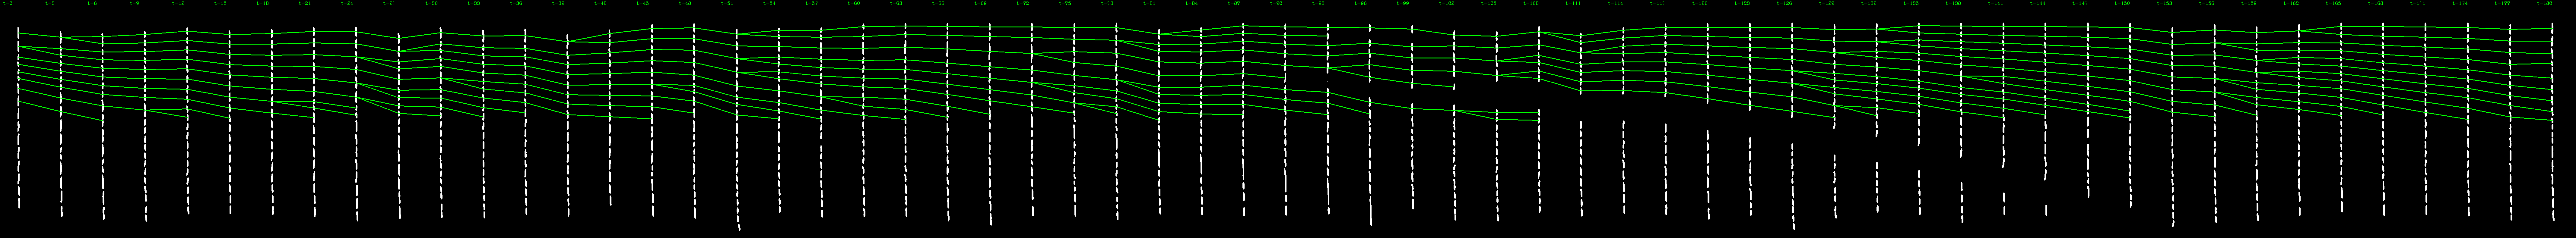

In [15]:
vis.label_images(mask_dir, mode="landscape-line", save_dir="F:\\Cambridge\\MENG\\UROP 2022\\Data\\MMLT\\tr1_masks\\landscape_masks_long\\", template=template_mask)

directory = "F:\\Cambridge\\MENG\\UROP 2022\\Data\\MMLT\\tr1_masks\\landscape_masks_long\\"
files = [f for f in os.listdir(directory)if os.path.isfile(os.path.join(directory, f))]
display(Image(directory+files[0], unconfined=True))

In [16]:
# vis.label_images(mask_dir, mode="barcode", save_dir="F:\\Cambridge\\MENG\\UROP 2022\\Data\\MMLT\\tr1_masks\\barcoded_masks_long\\", template=template_mask)
# directory = "F:\\Cambridge\\MENG\\UROP 2022\\Data\\MMLT\\tr1_masks\\barcoded_masks_long\\"
# files = [f for f in os.listdir(directory)if os.path.isfile(os.path.join(directory, f))]

# frames = 5
# fig, ax = plt.subplots(1, frames, figsize=(100, 100))
# ax_flat = ax.flatten()
# for i in range(frames):
#     img = mpimg.imread(directory + files[i])
#     ax_flat[i].imshow(img)
#     ax_flat[i].set_ylim(300)

In [17]:
# vis.label_images(mask_dir, mode="landscape-gray-scale", save_dir="F:\\Cambridge\\MENG\\UROP 2022\\Data\\MMLT\\tr1_masks\\landscape_gray_long\\", template=template_mask)

# directory = "F:\\Cambridge\\MENG\\UROP 2022\\Data\\MMLT\\tr1_masks\\landscape_gray_long\\"
# files = [f for f in os.listdir(directory)if os.path.isfile(os.path.join(directory, f))]
# display(Image(directory+files[0], unconfined=True))

In [18]:
# cells = vis.track_df.loc[(vis.track_df["trench_id"] == 1) &
#                                               (vis.track_df["time_(mins)"] == 0)].copy()
# print(cells)